In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 

In [19]:
class ImageProcessing():
    def __init__(self, image_path):
        self.image_path = image_path
        self.image = cv2.imread(image_path)
        self.image = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
    
    def show_image(self):
        plt.imshow(self.image, cmap='gray')
        plt.axis('off')
        plt.show()
    
    def save_image(self, save_path):
        cv2.imwrite(save_path, self.image)
    
    def gray(self):
        self.image = cv2.cvtColor(self.image, cv2.COLOR_RGB2GRAY)
        return self.image
    
    def blur(self, degree):
        if degree % 2 == 0:
            degree += 1
        self.image = cv2.medianBlur(self.image, degree)
        return self.image
    
    def edges(self):
        self.image = cv2.Canny(self.image, 100, 200)
        return self.image
    
    def remove_noise(self):
        self.image = cv2.fastNlMeansDenoising(self.image, None, 10, 7, 21)
        return self.image
    
    def saturation(self, value):
        hsv = cv2.cvtColor(self.image, cv2.COLOR_RGB2HSV)
        hsv[:,:,1] = hsv[:,:,1] * value
        self.image = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
        return self.image
    
    def brightness(self, value):
        hsv = cv2.cvtColor(self.image, cv2.COLOR_RGB2HSV)
        hsv[:,:,2] = hsv[:,:,2] * value
        self.image = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
        return self.image
    
    def contrast(self, value):
        self.image = cv2.convertScaleAbs(self.image, alpha=value, beta=0)
        return self.image


In [ ]:
class ImageManipulation(ImageProcessing):
    def __init__(self, image_path):
        super().__init__(image_path)
    
    def rotate(self, angle):
        rows, cols = self.image.shape[:2]
        M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
        self.image = cv2.warpAffine(self.image, M, (cols, rows))
        return self.image
    
    def resize(self, width=None, height=None, interpolation=cv2.INTER_AREA):
        dim = None
        (h, w) = self.image.shape[:2]
        
        if width is None and height is None:
            return self.image
        if width is None:
            r = height / float(h)
            dim = (int(w * r), height)
        else:
            r = width / float(w)
            dim = (width, int(h * r))
            
        self.image = cv2.resize(self.image, dim, interpolation=interpolation)
        return self.image
    
    def flip(self, direction):
        if direction == 'horizontal':
            self.image = cv2.flip(self.image, 1)
        elif direction == 'vertical':
            self.image = cv2.flip(self.image, 0)
        return self.image

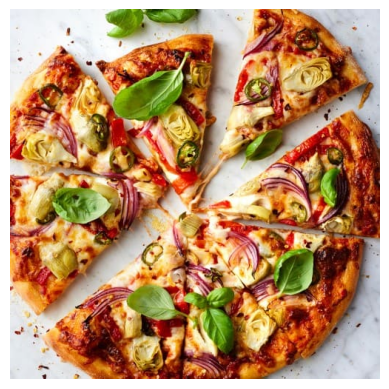

In [22]:
new_image = ImageProcessing('pizza.jpg')
new_image.contrast(1)
new_image.show_image()